# 5. Приближенное решение задачи Коши для обыкновенного дифференциального уравнения

Требуется методами Эйлера первого и второго порядка, Рунге-Кутта четвертого порядка и Адамса третьего порядка найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения на отрезке $ [0, 1] $ при шаге $ h = 0.05 $.

Используя расчет на грубой сетке $ h = 0.1 $, найти оценку точности по Рунге для половины узлов подробной сетки (только для решения, полученного методом Рунге-Кутта).

$$ u'' - \frac{2x}{1 + x^2} u' - \frac{2 (1 - x^2)}{(1 + x^2)^2} u = - \frac{5 (x^5 + 2x^3 + 3x)}{2 (1 + x^2)^2} $$
$$$$
$$ u(0) = 0, \space \space u'(0) = 2 $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def u(x):
    return 2 * (1 + x ** 2) * np.arctan(x) - (5 / 4) * x ** 3

def u_derivative(x):
    return 4 * x * np.arctan(x) + 2 - (15 / 4) * x ** 2

def u_derivative2(x):
    return 4 * np.arctan(x) + 4 * x / (1 + x ** 2) - (15 / 2) * x

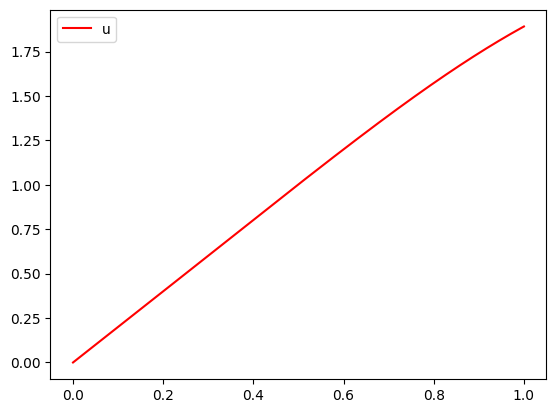

In [ ]:
x = np.linspace(0, 1, 10000)
plt.plot(x, u(x), label="u", c="red")
plt.legend()
plt.show()

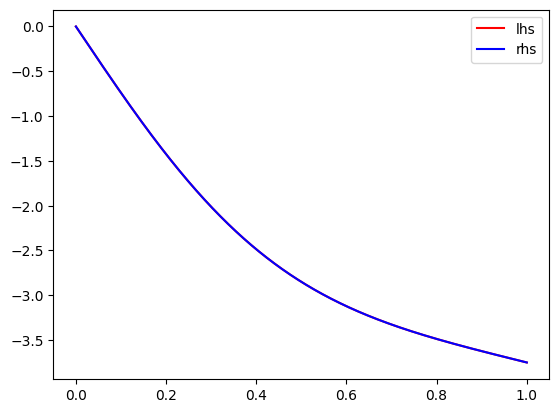

In [ ]:
def a(x):
    return 1
def b(x):
    return -(2 * x) / (1 + x ** 2)
def c(x):
    return -(2 * (1 - x ** 2)) / (1 + x ** 2) ** 2
def d(x):
    return -5 * (x ** 5 + 2 * x ** 3 + 3 * x) / (2 * (1 + x ** 2) ** 2)

def ode(x, u=u, u_derivative=u_derivative, u_derivative2=u_derivative2):
    return a(x) * u_derivative2(x) + b(x) * u_derivative(x) + c(x) * u(x)

x = np.linspace(0, 1, 10000)
plt.plot(x, ode(x), label="lhs", c="red")
plt.plot(x, d(x), label="rhs", c="blue")
plt.legend()
plt.show()

In [ ]:
h = 0.05

## Решение задачи Коши

Сведем дифференциальное уравнение второго порядка к системе из двух дифференциальных уравнений первого порядка следующим образом:
1. Возьмем $ a = u $ и $ b = u' $
2. Составим систему из $ da/dx = b $ и $ db/dx = \frac{2x}{1 + x^2} b + \frac{2 (1 - x^2)}{(1 + x^2)^2} a - \frac{5 (x^5 + 2x^3 + 3x)}{2 (1 + x^2)^2}$

In [ ]:
VAR_NAMES = ["u", "u'"]
u0 = {
    "u": 0,
    "u'": 2,
}
functions = {
    "u": lambda x, vars: vars["u'"],
    "u'":
        lambda x, vars: \
            -b(x) * vars["u'"] + \
            -c(x) * vars["u"] \
            + d(x),
}

In [ ]:
def analyze(method, h=h, plot=True):
    us = []
    uds = []

    for results in method(h):
        us.append(results["u"])
        uds.append(results["u'"])

    xs = np.linspace(0, 1, int(1 / h + 1))

    us_error = 0
    true_us = u(xs)
    for i in range(len(true_us)):
        us_error = max(us_error, abs(true_us[i] - us[i]))
    if plot:
        plt.plot(xs, true_us, label="true u")
        plt.plot(xs, us, label="predicted u")
        plt.legend()
        plt.show()

    uds_error = 0
    true_uds = u_derivative(xs)
    for i in range(len(true_uds)):
        uds_error = max(uds_error, abs(true_uds[i] - uds[i]))
    if plot:
        plt.plot(xs, true_uds, label="true u'")
        plt.plot(xs, uds, label="predicted u'")
        plt.legend()
        plt.show()

    return (us_error, uds_error)

Здесь и далее формулы методов приведены для уравнения $ dy/dx = f(x, y) $

### Метод Эйлера первого порядка

Метод Эйлера первого порядка:
$$ y_{i+1} = y_i + h f(x_i, y_i) $$

In [ ]:
def euler1(h=h, u0=u0, functions=functions):
    us = [u0]
    for x in np.linspace(0, 1, int(1 / h + 1))[:-1]:
        us.append({var_name: us[-1][var_name] + h * functions[var_name](x, us[-1]) for var_name in VAR_NAMES})
    return us

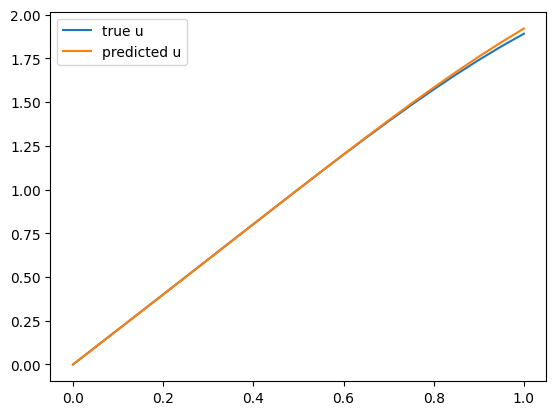

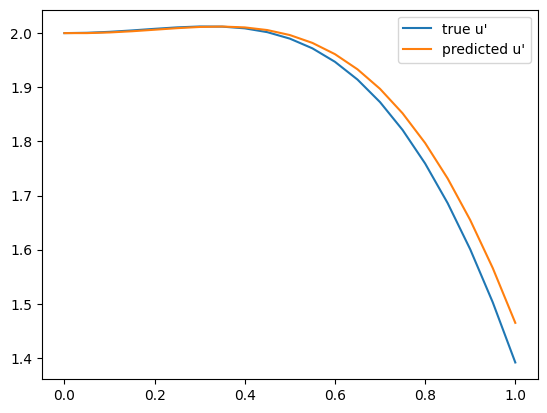

(np.float64(0.029925909709603404), np.float64(0.07321477343709448))

In [ ]:
analyze(euler1)




In [ ]:
errors_euler1_us = []
errors_euler1_uds = []
steps = [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001, 0.0001]
for h in steps:
    e1, e2 = analyze(euler1, h, plot=False)
    errors_euler1_us.append(e1)
    errors_euler1_uds.append(e2)

### Метод Эйлера второго порядка

Метод Эйлера второго порядка:
$$ y^*_{i+1} = y_i + h f(x_i, y_i) $$
$$ $$
$$ y_{i+1} = y_i + h \frac{f(x_i, y_i) + f(x_i + h, y^*_{i+1})}{2} $$


In [ ]:
def euler2(h=h, u0=u0, functions=functions):
    us = [u0]
    for x in np.linspace(0, 1, int(1 / h + 1))[:-1]:
        y_star = {var_name:
                  us[-1][var_name] + h * functions[var_name](x, us[-1])
        for var_name in VAR_NAMES}
        us.append({var_name:
                    us[-1][var_name] + \
                    0.5 * h * (functions[var_name](x, us[-1]) + \
                               functions[var_name](x + h, y_star))
        for var_name in VAR_NAMES})
    return us

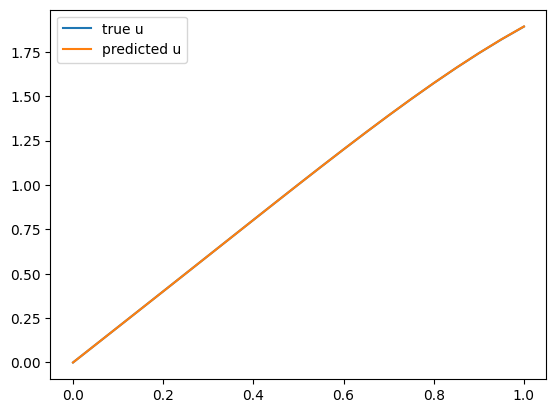

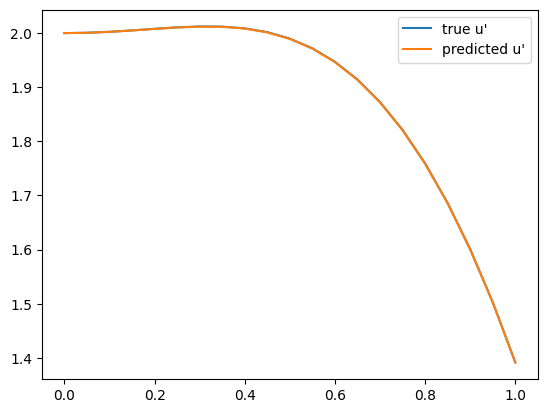

(np.float64(0.0005931086394115326), np.float64(0.0005994035239740292))

In [ ]:
analyze(euler2)

In [ ]:
errors_euler2_us = []
errors_euler2_uds = []
for h in steps:
    e1, e2 = analyze(euler2, h, plot=False)
    errors_euler2_us.append(e1)
    errors_euler2_uds.append(e2)

Метод Рунге-Кутта второго порядка

In [ ]:
def rungekutta2(h=h, u0=u0, functions=functions):
    us = [u0]
    for x in np.linspace(0, 1, int(1 / h + 1))[:-1]:
        k1 = {var_name: functions[var_name](x, us[-1])
              for var_name in VAR_NAMES}

        temp_k2 = {var_name: us[-1][var_name] + 0.5 * h * k1[var_name]
                   for var_name in VAR_NAMES}
        k2 = {var_name: functions[var_name](x + 0.5 * h, temp_k2)
              for var_name in VAR_NAMES}

        us.append({var_name:
                  us[-1][var_name] + \
                  h * k2[var_name]
                  for var_name in VAR_NAMES})
    return us

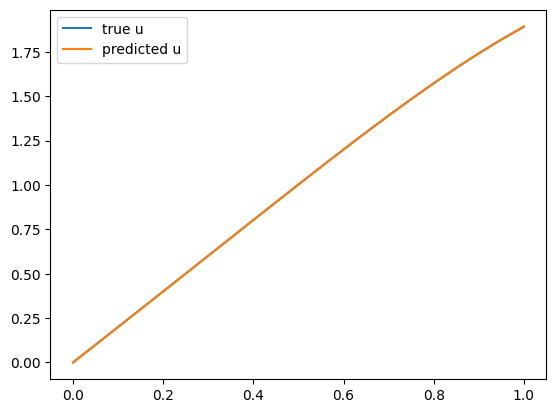

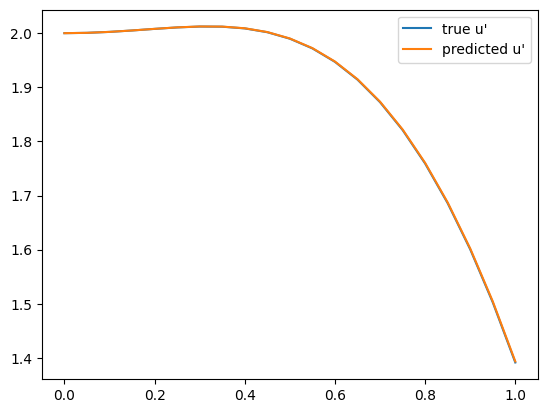

(np.float64(0.0015240414828470161), np.float64(0.001955968353316573))

In [ ]:
analyze(rungekutta2)

In [ ]:
errors_rungekutta2_us = []
errors_rungekutta2_uds = []
for h in steps:
    e1, e2 = analyze(rungekutta2, h, plot=False)
    errors_rungekutta2_us.append(e1)
    errors_rungekutta2_uds.append(e2)

### Метод Эйлера третьего порядка


In [ ]:
def euler3(h=h, u0=u0, functions=functions):
    us = [u0]
    for x in np.linspace(0, 1, int(1 / h + 1))[:-1]:
        k1 = {var_name: functions[var_name](x, us[-1])
              for var_name in VAR_NAMES}

        temp_k2 = {var_name: us[-1][var_name] + (h/3) * k1[var_name]
                   for var_name in VAR_NAMES}
        k2 = {var_name: functions[var_name](x + h/3, temp_k2)
              for var_name in VAR_NAMES}

        temp_k3 = {var_name: us[-1][var_name] + (2*h/3) * k2[var_name]
                   for var_name in VAR_NAMES}
        k3 = {var_name: functions[var_name](x + 2*h/3, temp_k3)
              for var_name in VAR_NAMES}

        us.append({var_name:
                  us[-1][var_name] + \
                  (h/4) * (k1[var_name] + 3 * k3[var_name])
                  for var_name in VAR_NAMES})
    return us

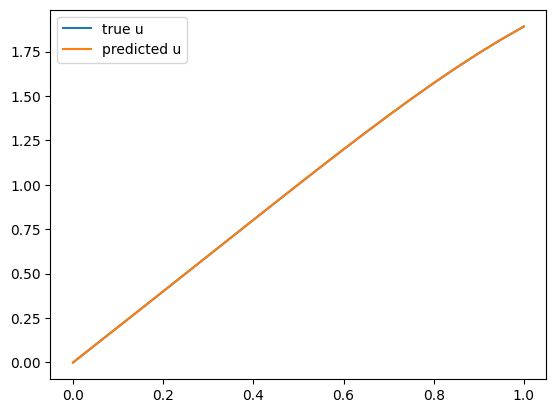

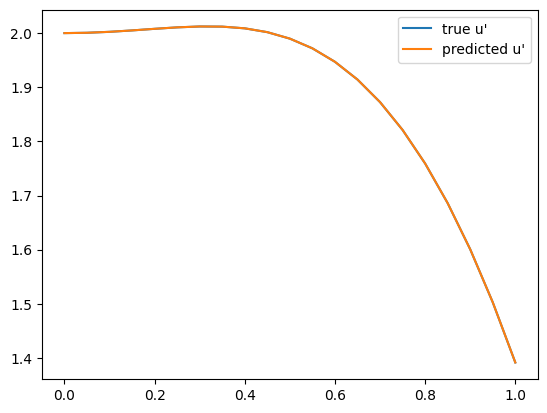

(np.float64(3.105958629046057e-05), np.float64(3.474180988560782e-05))

In [ ]:
analyze(euler3)

In [ ]:
errors_euler3_us = []
errors_euler3_uds = []
for h in steps:
    e1, e2 = analyze(euler3, h, plot=False)
    errors_euler3_us.append(e1)
    errors_euler3_uds.append(e2)

### Метод Адамса третьего порядка

In [ ]:
def adams3(h=h, u0=u0, functions=functions):
    xs = np.linspace(0, 1, int(1 / h + 1))

    us = [{"u": u, "u'": ud} for u, ud in zip(u(xs)[:3], u_derivative(xs)[:3])]
    for x in xs[2:-1]:
        k1 = {var_name:
                   functions[var_name](x - 2 * h, us[-3])
        for var_name in VAR_NAMES}

        k2 = {var_name:
              functions[var_name](x - h, us[-2])
        for var_name in VAR_NAMES}

        k3 = {var_name:
                     functions[var_name](x, us[-1])
        for var_name in VAR_NAMES}

        us.append({var_name:
                    us[-1][var_name] +
                    (h / 12) * (23 * k3[var_name] - 16 * k2[var_name] + 5 * k1[var_name])
        for var_name in VAR_NAMES})
    return us

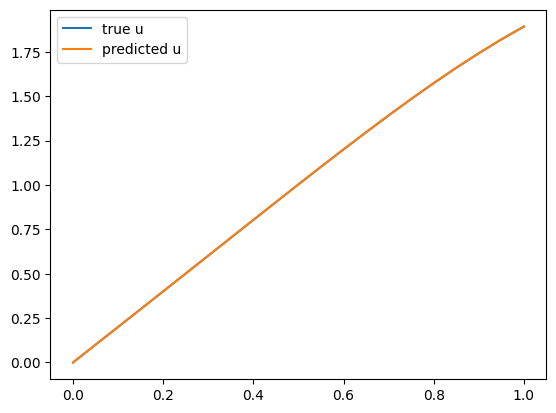

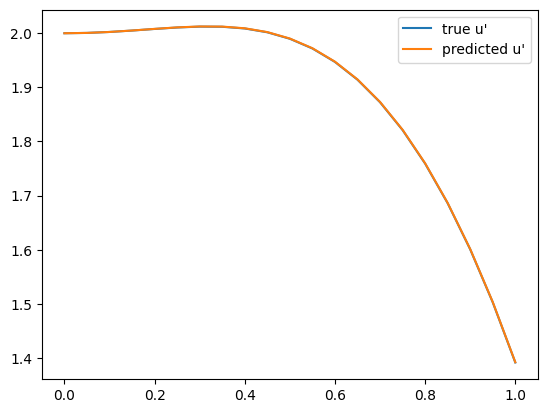

(np.float64(0.0006131599281387068), np.float64(0.0005404341516317412))

In [ ]:
analyze(adams3)

In [ ]:
errors_adams3_us = []
errors_adams3_uds = []
for h in steps:
    e1, e2 = analyze(adams3, h, plot=False)
    errors_adams3_us.append(e1)
    errors_adams3_uds.append(e2)

### Метод Рунге-Кутта четвертого порядка

Формула метода Рунге-Кутта четвертого порядка:
$$ y_{i+1} = y_i + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4) $$
$$$$
где:
$$ k_1 = f(x_i, y_i) $$
$$$$
$$ k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_1) $$
$$$$
$$ k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_2) $$
$$$$
$$ k_4 = f(x_i + h, y_i + h k_3) $$

In [ ]:
def rungekutta4(h=h, u0=u0, functions=functions):
    us = [u0]
    for x in np.linspace(0, 1, int(1 / h + 1))[:-1]:
        k1 = {var_name:
              functions[var_name](x, us[-1])
        for var_name in VAR_NAMES}

        temp_k2 = {var_name:
                   us[-1][var_name] + 0.5 * h * k1[var_name]
        for var_name in VAR_NAMES}
        k2 = {var_name:
              functions[var_name](x + 0.5 * h, temp_k2)
        for var_name in VAR_NAMES}

        temp_k3 = {var_name:
                   us[-1][var_name] + 0.5 * h * k2[var_name]
        for var_name in VAR_NAMES}
        k3 = {var_name:
              functions[var_name](x + 0.5 * h, temp_k3)
        for var_name in VAR_NAMES}

        temp_k4 = {var_name:
                   us[-1][var_name] + h * k3[var_name]
        for var_name in VAR_NAMES}
        k4 = {var_name:
              functions[var_name](x + h, temp_k4)
        for var_name in VAR_NAMES}

        us.append({var_name:
                   us[-1][var_name] + \
                    (h / 6) * (k1[var_name] + 2*k2[var_name] + 2*k3[var_name] + k4[var_name])
        for var_name in VAR_NAMES})
    return us

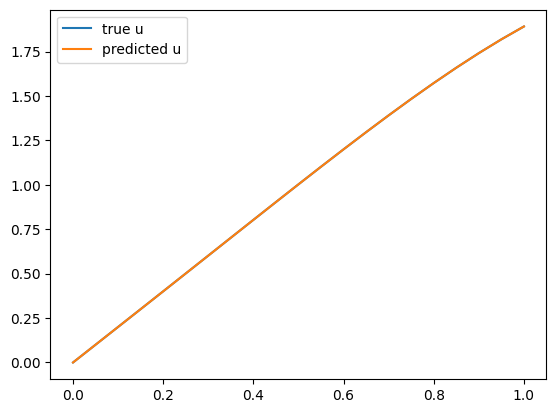

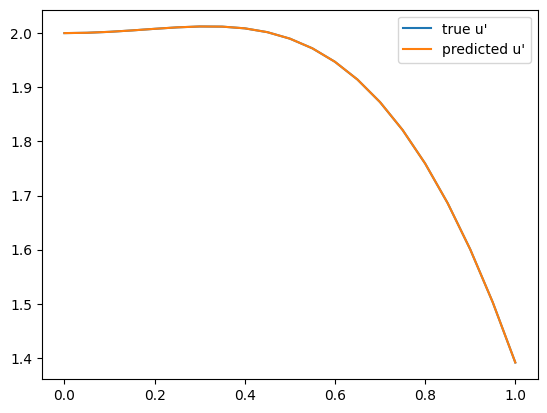

(np.float64(3.860642270314685e-07), np.float64(7.147973157817233e-07))

In [ ]:
analyze(rungekutta4)

In [ ]:
errors_rungekutta4_us = []
errors_rungekutta4_uds = []
for h in steps:
    e1, e2 = analyze(rungekutta4, h, plot=False)
    errors_rungekutta4_us.append(e1)
    errors_rungekutta4_uds.append(e2)

###

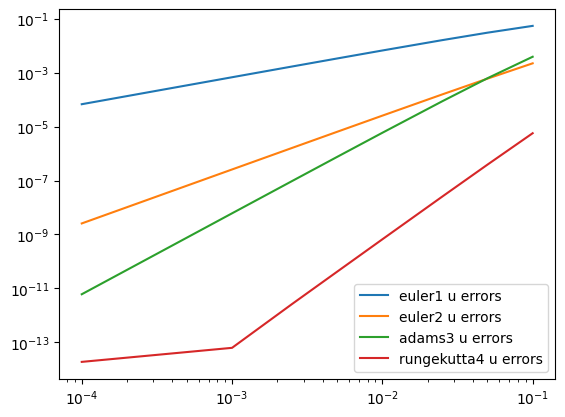

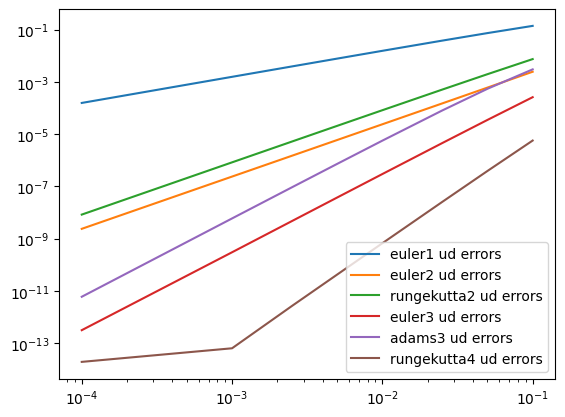

In [ ]:
plt.loglog(steps, errors_euler1_us, label="euler1 u errors")
plt.loglog(steps, errors_euler2_us, label="euler2 u errors")
#plt.loglog(steps, errors_rungekutta2_us, label="rungekutta2 u errors")
#plt.loglog(steps, errors_euler3_us, label="euler3 u errors")
plt.loglog(steps, errors_adams3_us, label="adams3 u errors")
plt.loglog(steps, errors_rungekutta4_us, label="rungekutta4 u errors")
plt.legend()
plt.show()

plt.loglog(steps, errors_euler1_uds, label="euler1 ud errors")
plt.loglog(steps, errors_euler2_uds, label="euler2 ud errors")
plt.loglog(steps, errors_rungekutta2_uds, label="rungekutta2 ud errors")
plt.loglog(steps, errors_euler3_uds, label="euler3 ud errors")
plt.loglog(steps, errors_adams3_uds, label="adams3 ud errors")
plt.loglog(steps, errors_rungekutta4_us, label="rungekutta4 ud errors")
plt.legend()
plt.show()

## Оценка точности по Рунге

In [ ]:
def runge_error_estimation():
    h_coarse = 0.1
    results_coarse = rungekutta4(h_coarse)
    xs_coarse = np.linspace(0, 1, int(1 / h_coarse + 1))

    h_fine = 0.05
    results_fine = rungekutta4(h_fine)
    xs_fine = np.linspace(0, 1, int(1 / h_fine + 1))

    selected_indices = range(0, len(xs_fine), 2)  # 0, 2, 4, ...
    selected_xs = xs_fine[selected_indices]
    selected_results = [results_fine[i] for i in selected_indices]

    interpolated_coarse = []
    for i, x in enumerate(selected_xs):
        interpolated_coarse.append(results_coarse[i])
    return selected_xs, selected_results, interpolated_coarse

In [ ]:
p = 4
denominator = 2 ** p - 1

errors_u = []
errors_ud = []

selected_xs, selected_results, interpolated_coarse = runge_error_estimation()
for i in range(len(selected_xs)):
    error_u = abs(selected_results[i]["u"] - interpolated_coarse[i]["u"]) / denominator
    error_ud = abs(selected_results[i]["u'"] - interpolated_coarse[i]["u'"]) / denominator

    errors_u.append(error_u)
    errors_ud.append(error_ud)

    print(f"{selected_xs[i]:.2f}\t\t{error_u:.2e}\t\t{error_ud:.2e}")

0.00		0.00e+00		0.00e+00
0.10		2.29e-08		1.28e-08
0.20		4.25e-08		4.89e-08
0.30		5.87e-08		1.01e-07
0.40		7.43e-08		1.63e-07
0.50		9.35e-08		2.31e-07
0.60		1.21e-07		3.05e-07
0.70		1.59e-07		3.85e-07
0.80		2.10e-07		4.71e-07
0.90		2.74e-07		5.64e-07
1.00		3.51e-07		6.61e-07


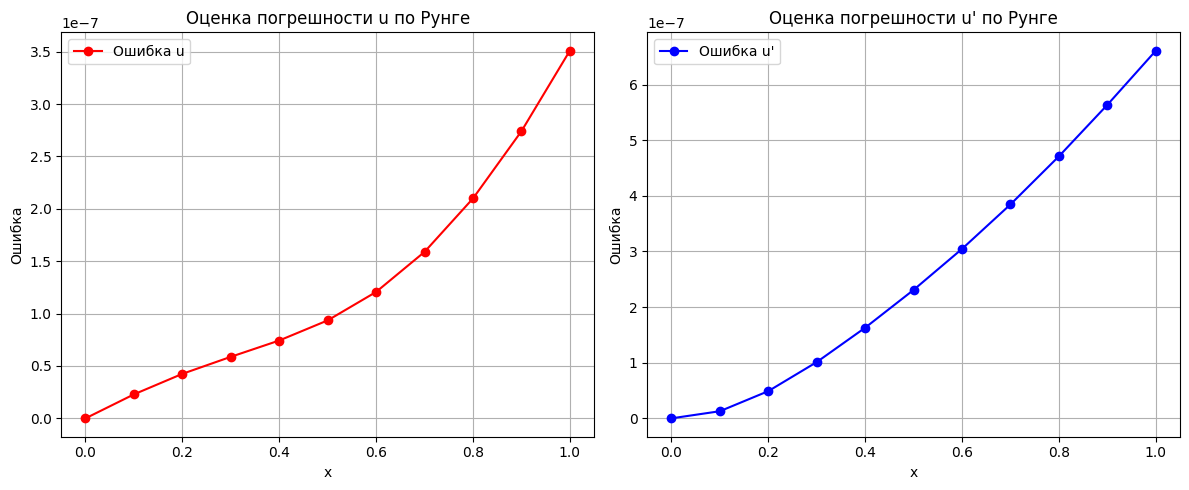


Максимальная оценка погрешности:
u: 3.51e-07
u': 6.61e-07


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(selected_xs, errors_u, 'o-', label='Ошибка u', color='red')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.title('Оценка погрешности u по Рунге')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(selected_xs, errors_ud, 'o-', label="Ошибка u'", color='blue')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.title("Оценка погрешности u' по Рунге")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

max_error_u = max(errors_u)
max_error_ud = max(errors_ud)
print(f"\nМаксимальная оценка погрешности:")
print(f"u: {max_error_u:.2e}")
print(f"u': {max_error_ud:.2e}")